En este escrito se muestra el movimiento de un objeto, el cual tiene presente la fuerza de magnus y la fuerza de fricción cuadrática.

$$\frac{\vec{F}}{m}=\vec{g}-C_{d}|\vec{v}|v+C_{m}(\vec{w}\times \vec{v})$$

Donde:

$$m=1,490 gr$$

$$w=cte$$

$$C_{d}= 6X10^{-3}$$

$$C_{m}= 4x10^{-4}$$

para solucionar el el programa tendremos en cuenta los siguientes parametros:

$Z_{0}=1.8 m$

$X_{0}=18.0 m$

$V_{0}=40 m/s$

En la primera parte de este programa crearemos un código que solucione para un objeto que es lanzado desde una altura $Z_{0}$ recorriendo una distancia $X_{0}$ hasta llegar a una altura de $X_{f}=1.5m$, aquí vamos a considerar $C_{d}= 0$ y $C_{m}=0$ 

Para saber que con que angulo fue lanzado el objeto para que llegara justo a una altura de 1.5m utilizamos las ecuaciones del movimiento parabólico en las cuales remplazando datos y operando hallamos el angulo del lanzamiento.

$$X=X_{0}+V_{x}t$$

$$Z=Z_{0}+V_{z}t+\frac{1}{2}a_{z}t^{2}$$

\begin{equation}
0=18-40cos\left ( \theta  \right )t \\
t=\frac{18}{40cos\left ( \theta  \right )} \\
\end{equation}

\begin{equation}
1.5=1.8+40sen\left ( \theta  \right )\left ( \frac{18}{40cos(\theta )} \right )-\frac{1}{2}(9.8)\left ( \frac{18}{40cos(\theta )} \right )^{2}\\
\end{equation}

\begin{equation}
0.3=18tan(\theta )-0.99225sec^{2}(\theta ) \\
\end{equation}

\begin{equation}
0.99225tan^{2}(\theta)-18tan(\theta)+0.69225\\
\end{equation}

\begin{equation}
tan(\theta)=0.0385\Rightarrow \theta=2.2^{o}
\end{equation}

Tambien le bajamos el orden a la ecuación diferencial con el proposito de poder utilizar el metodo de euler para resolver este movimiento.


In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import linspace
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# definimos la solucion de la ecuacion diferencial por el metodo de Euler

def euler(g,Cd,Cm,Vox,Voy,Voz,Wx,Wy,Wz,Xo,Yo,Zo,tmin,tmax,Deltat,funx,funy,funz):
    # tiempo y cantidad de puntos
    N = (tmax - tmin)/Deltat # me indica la cantidad de puntos para poder definir la libreria linspace
    t = linspace(tmin,tmax,int(N))
    
    #velocidad
    vx = np.zeros(len(t))
    vy = np.zeros(len(t)) # son zeros porque se define un tamaño base para el vector con valores conocidos
    vz = np.zeros(len(t)) #len(t) me define el tamaño

    
    # posicion
    x = np.zeros(len(t))
    y = np.zeros(len(t))
    z = np.zeros(len(t))
    
    # condiciones iniciales
    x[0] = Xo
    y[0] = Yo # las condiciones iniciales marcan como se define el movimiento para cada ecuación diferencial
    z[0] = Zo
    
    vx[0] = Vox
    vy[0] = Voy
    vz[0] = Voz
    
    for i in range(len(t)-1):
        
        Vx = vx[i]
        Vy = vy[i]# se definen para poder evaluar la funcion ya que no son argumentos de entrada
        Vz = vz[i]
        
        #evaluacion de las funciones
        acel1 = float(eval(funx))
        acel2 = float(eval(funy)) # contiene la ecuacion diferencial con las variables independientes cuyas contantes 
        acel3 = float(eval(funz)) # ya contienen el valor numerico evaluado
        
        #valor de la velicidad
        vx[i+1] = vx[i] + Deltat*acel1
        vy[i+1] = vy[i] + Deltat*acel2 # soluciones para velocidades
        vz[i+1] = vz[i] + Deltat*acel3
        
        #valor de la posicion
        x[i+1] = x[i] + Deltat*vx[i]
        y[i+1] = y[i] + Deltat*vy[i] #soluciones de la posicion  a partir de la velocidades
        z[i+1] = z[i] + Deltat*vz[i]
        
    return(t,x,y,z)

In [3]:
#parametros de entrada, sistema internacional(SI)

g = 9.8 # m/S2
M = 0.149 #kg
Cd = 0
Cm = 0
Vo = 40
wo = 200
Xo = 18.0
Yo = 0
Zo = 1.8
angulo=2.2

# angulos de cosenos directores
alpha = 0*np.pi/180
beta = 90*np.pi/180 # para definir la posicion del vector en el espacio tridimencional, solo hay velocidad inicial en x.
gamma = (90-angulo)*np.pi/180

# volicidad para cada base ortogonal
Vx = Vo*np.cos(alpha)
Vy = Vo*np.cos(beta) 
Vz = Vo*np.cos(gamma)

# angulos cosenos directores para W
alphaw = 90*np.pi/180 # x
betaw = 0*np.pi/180   #       # me define que el vector esta en la dirreccion y
gammaw = 90*np.pi/180

# frecuencia angular para cada base ortogonal
Wx = wo*np.cos(alphaw)
Wy = wo*np.cos(betaw)
Wz = wo*np.cos(gammaw)


# intervalo temporal
tmin = 0
tmax = 0.45 # 2*Vo/g
N = 300
Deltat = (tmax-tmin)/N

# ecuacion diferencial acoplada que define el movimiento
funx = '-Cd*((Vx**2+Vy**2+Vz**2)**0.5)*Vx+Cm*(Wy*Vz-Wz*Vy)'
funy = '-Cd*((Vx**2+Vy**2+Vz**2)**0.5)*Vy+Cm*(Wz*Vx-Wx*Vz)'
funz = '-g-Cd*((Vx**2+Vy**2+Vz**2)**0.5)*Vz+Cm*(Wx*Vy-Wy*Vx)'

# solucion de la ecuacion diferencial
(t,x,y,z) = euler(g,Cd,Cm,Vx,Vy,Vz,Wx,Wy,Wz,Xo,Yo,Zo,tmin,tmax,Deltat,funx,funy,funz)

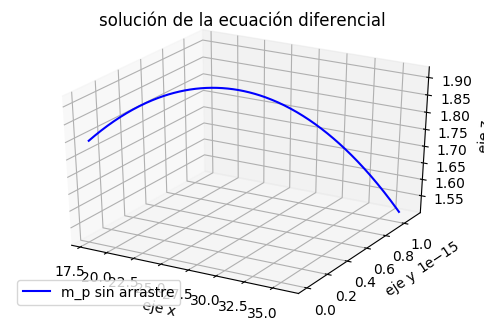

In [4]:
# grafica tridimencional
%matplotlib inline
fig = plt.figure(figsize=(6,4),dpi=100)
ax = plt.axes(projection = '3d')
ax.plot3D(x,y,z,'blue',label='m_p sin arrastre')
ax.set_title('solución de la ecuación diferencial')
ax.set_xlabel('eje x')
ax.set_ylabel('eje y')
ax.set_zlabel('eje z')
ax.legend(loc='lower left')
plt.show()

Para la segunda parte de este trabajo consideraremos una fuerza de arrastre, por lo tanto la ecuación para la acerelaracion queda modificada como:

$$\frac{\vec{F}}{m}=\vec{g}-C_{d}|\vec{v}|v$$

In [5]:
#constante de arrastre
Cd = 6e-3
#solucion con arrastre
(t1,x1,y1,z1) = euler(g,Cd,Cm,Vx,Vy,Vz,Wx,Wy,Wz,Xo,Yo,Zo,tmin,tmax,Deltat,funx,funy,funz)

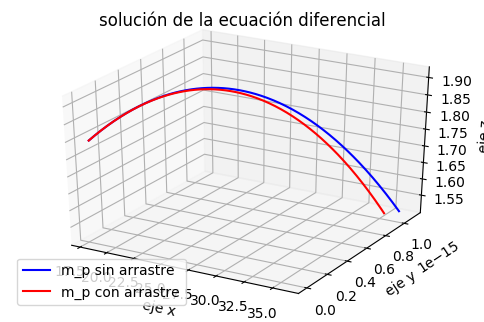

In [6]:
# grafica tridimencional
%matplotlib inline
fig = plt.figure(figsize=(6,4),dpi=100)
ax = plt.axes(projection = '3d')
ax.plot3D(x,y,z,'blue',label='m_p sin arrastre')
ax.plot3D(x1,y1,z1,'red',label='m_p con arrastre')
ax.set_title('solución de la ecuación diferencial')
ax.set_xlabel('eje x')
ax.set_ylabel('eje y')
ax.set_zlabel('eje z')
ax.legend(loc='lower left')
plt.show()

Para el tercer y ultimo caso consideraremos el efecto Magnus.

$$\frac{\vec{F}}{m}=\vec{g}-C_{d}|\vec{v}|v+C_{m}(\vec{w}\times \vec{v})$$

In [7]:
#constante de arrastre 
Cd = 6e-3
#constante de magnus
Cm = 4e-4
#solucion con fuerza magnuz
(t2,x2,y2,z2) = euler(g,Cd,Cm,Vx,Vy,Vz,Wx,Wy,Wz,Xo,Yo,Zo,tmin,tmax,Deltat,funx,funy,funz)

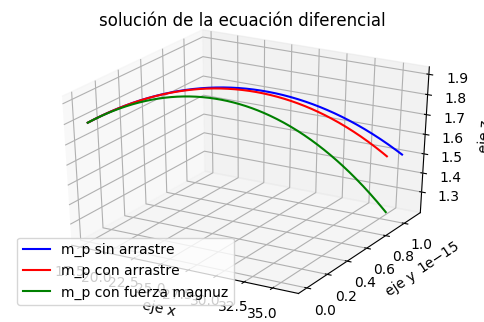

In [8]:
# grafica tridimencional
%matplotlib inline
fig = plt.figure(figsize=(6,4),dpi=100)
ax = plt.axes(projection = '3d')
ax.plot3D(x,y,z,'blue',label='m_p sin arrastre')
ax.plot3D(x1,y1,z1,'red',label='m_p con arrastre')
ax.plot3D(x2,y2,z2,'green',label='m_p con fuerza magnuz')
ax.set_title('solución de la ecuación diferencial')
ax.set_xlabel('eje x')
ax.set_ylabel('eje y')
ax.set_zlabel('eje z')
ax.legend(loc='lower left')
plt.show()